In [1]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

In [2]:
# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles

In [ ]:
folder = read_dic('/Users/alex/Documents/GitHub/Visual-Similarity/Data/7_Maurer_inprep_followup')
image_Labels = []
for file in folder:
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds to adjust ink
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 255
            else:
                data[m][n] = 0
    num_labels, labels = cv2.connectedComponents(data)
    image_Labels.append(labels)
    

In [ ]:
flat_list = [item for sublist in labels for item in sublist]
set(flat_list)
flat_list = [item for sublist in data for item in sublist]
set(flat_list)

In [ ]:
# np.savetxt("/Users/alex/Desktop/data.csv", data, delimiter=",")

In [ ]:
# list all i and j in dictionary according to labels
dic = {}
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i][j] in dic.keys():
            dic[labels[i][j]].append((i,j))
        else:
            dic[labels[i][j]] = []
            dic[labels[i][j]].append((i,j))

In [ ]:
# define function find min&max i&j in dictionary for each key
def find_min_max_ij(dic):   
    i_s =[]
    j_s =[]
    for tup in dic:
        i_s.append(tup[0])
        j_s.append(tup[1])
    i_min,i_max = min(i_s),max(i_s)
    j_min,j_max = min(j_s),max(j_s)
    return i_min,i_max,j_min,j_max

In [ ]:
# make a dic for i&j min&max
dic_min_max= {}
for obj in dic.keys():
    i_min,i_max,j_min,j_max = find_min_max_ij(dic[obj])
    dic_min_max[obj] = [i_min,i_max,j_min,j_max]

In [ ]:
dic_min_max


In [ ]:
print(i_min)

In [ ]:
# define contain function
def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
    if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
        return True # label 1 contains label 2
    else:
        return False

In [ ]:
# find where the 0s are in original data -> 8 in 'labels'
for key in dic.keys():
    for k in range(len(dic[key])):
        if data[dic[key][k]] == 255:
            labels[dic[key][k]] = 8

In [ ]:
# generate pairwise list of labels
pair_list = []
for t in range(0,len([*dic])):
	for p in range(0,len([*dic])):
		if (t!=p):
			pair_list.append(([*dic][t],[*dic][p]))


In [ ]:
# contain function -> if some components are contained by the other, change them to the same
for pair in pair_list:
    key1 = pair[0]
    key2 = pair[1]
    if contain(dic_min_max[key1][0], dic_min_max[key1][1], dic_min_max[key1][2], dic_min_max[key1][3],
    dic_min_max[key2][0], dic_min_max[key2][1], dic_min_max[key2][2], dic_min_max[key2][3]) == True:
        for kk in range(len(dic[key1])):
            labels[dic[key1][kk]] = labels[dic[key1][kk]]

In [ ]:
plt.imshow(labels)
print(labels[52])

In [ ]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles

folder = read_dic('/Users/alex/Documents/GitHub/Visual-Similarity/Data/7_Maurer_inprep_followup')
image_Labels = []
for file in folder:
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds to adjust ink
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 255
            else:
                data[m][n] = 0
    num_labels, labels = cv2.connectedComponents(data)
    image_Labels.append(labels)

for labels in image_Labels:
    # list all i and j in dictionary according to labels
    dic = {}
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            if labels[i][j] in dic.keys():
                dic[labels[i][j]].append((i,j))
            else:
                dic[labels[i][j]] = []
                dic[labels[i][j]].append((i,j))

    # define function find min&max i&j in dictionary for each key
    def find_min_max_ij(dic):   
        i_s =[]
        j_s =[]
        for tup in dic:
            i_s.append(tup[0])
            j_s.append(tup[1])
        i_min,i_max = min(i_s),max(i_s)
        j_min,j_max = min(j_s),max(j_s)
        return i_min,i_max,j_min,j_max

    # make a dic for i&j min&max
    dic_min_max= {}
    for obj in dic.keys():
        i_min,i_max,j_min,j_max = find_min_max_ij(dic[obj])
        dic_min_max[obj] = [i_min,i_max,j_min,j_max]

    # define contain function
    def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
        if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
            return True # label 1 contains label 2
        else:
            return False

    # find where the 0s are in original data -> 8 in 'labels'
    for key in dic.keys():
        for k in range(len(dic[key])):
            if data[dic[key][k]] == 255:
                labels[dic[key][k]] = 8

    # generate pairwise list of labels
    pair_list = []
    for t in range(0,len([*dic])):
        for p in range(0,len([*dic])):
            if (t!=p):
                pair_list.append(([*dic][t],[*dic][p]))

    # contain function -> if some components are contained by the other, change them to the same
    for pair in pair_list:
        key1 = pair[0]
        key2 = pair[1]
        if contain(dic_min_max[key1][0], dic_min_max[key1][1], dic_min_max[key1][2], dic_min_max[key1][3],
        dic_min_max[key2][0], dic_min_max[key2][1], dic_min_max[key2][2], dic_min_max[key2][3]) == True:
            for kk in range(len(dic[key1])):
                labels[dic[key1][kk]] = labels[dic[key1][kk]]


In [ ]:
set(flat_list)

In [ ]:
dic

In [22]:
plt.imshow(image_Labels[10])


IndexError: list index out of range

In [45]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import random

# read file function
def read_dic(mypath:str)-> list:
    onlyfiles = [mypath + '/'+f for f in listdir(mypath) if isfile(join(mypath, f)) and f != ".DS_Store"]
    return onlyfiles
def find_min_max_ij(dic):   
    i_s =[]
    j_s =[]
    for tup in dic:
        i_s.append(tup[0])
        j_s.append(tup[1])
    i_min,i_max = min(i_s),max(i_s)
    j_min,j_max = min(j_s),max(j_s)
    return i_min,i_max,j_min,j_max
# define contain function
def contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
    if i_min1<i_min2 and j_min1<j_min2 and i_max1>i_max2 and j_max1>j_max2:
        return True # label 1 contains label 2
    else:
        return False

def flat_list(listt):
    flat_list = [item for sublist in listt for item in sublist]
    return set(flat_list)


folder = read_dic('Data/7_Maurer_inprep_followup')
image_Labels = []
data_list = []
image_stats = []
for file in folder:
    image_stat = []
    # load the image
    image = Image.open(file)
    # convert image to numpy array
    data = asarray(image)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    # set thresholds
    for m in range(data.shape[0]):
        for n in range(data.shape[1]):
            if data[m][n] > 127.5:
                data[m][n] = 0
            else:
                data[m][n] = 1
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(data, connectivity=8, ltype=None)
    
    background = 100
    ind = []
    flag = 0
    for stat in stats:
        count = 1
        allt = 1
        if stat[4] == 13827:
            flag +=1
            pass
#         if 1 != 2:
#             pass
        else:
            for i in range(stat[0],stat[2]):
                for j in range(stat[1],stat[3]):
                    allt +=1 
                    if data[i][j] == 0:
                        count += 1
#         print(count/allt)
        if count/allt > 0.99:
            ind.append(flag)
            image_stat.append(stat)
        flag +=1 
#     print(file,ind)
    image_stats.append(image_stat)
#     算contain
    length = len(image_stat)
    count = 0
    for i in range(len(image_stat)):
        for j in range(i + 1, len(image_stat)):
            
            i_min1, j_min1 = image_stat[i][0], image_stat[i][1]
            i_max1, j_max1 = image_stat[i][0]+image_stat[i][2], image_stat[i][1]+image_stat[i][3]
            i_min2, j_min2 = image_stat[j][0], image_stat[j][1]
            i_max2, j_max2 = image_stat[j][0]+image_stat[j][2], image_stat[j][1]+image_stat[j][3]
    
            if contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
                count +=1 
    print(file,length - count)
        
        
    
    


Data/7_Maurer_inprep_followup/c33.png 2
Data/7_Maurer_inprep_followup/c27.png 4
Data/7_Maurer_inprep_followup/c8.png 3
Data/7_Maurer_inprep_followup/k12.png 3
Data/7_Maurer_inprep_followup/k13.png 4
Data/7_Maurer_inprep_followup/c9.png 1
Data/7_Maurer_inprep_followup/c26.png 4
Data/7_Maurer_inprep_followup/c32.png 4
Data/7_Maurer_inprep_followup/c24.png 1
Data/7_Maurer_inprep_followup/c30.png 2
Data/7_Maurer_inprep_followup/c18.png 4
Data/7_Maurer_inprep_followup/k39.png 2
Data/7_Maurer_inprep_followup/k11.png 3
Data/7_Maurer_inprep_followup/k10.png 1
Data/7_Maurer_inprep_followup/k38.png 4
Data/7_Maurer_inprep_followup/c19.png 1
Data/7_Maurer_inprep_followup/c31.png 1
Data/7_Maurer_inprep_followup/c25.png 1
Data/7_Maurer_inprep_followup/c21.png 1
Data/7_Maurer_inprep_followup/c35.png 2
Data/7_Maurer_inprep_followup/k14.png 3
Data/7_Maurer_inprep_followup/k28.png 4
Data/7_Maurer_inprep_followup/k29.png 3
Data/7_Maurer_inprep_followup/k15.png 3
Data/7_Maurer_inprep_followup/c34.png 3
Da

In [43]:
image_stats

[[array([ 39,  39,  15,  42, 327], dtype=int32),
  array([ 56,  42,  25,  41, 348], dtype=int32)],
 [array([ 39,  39,  15,  43, 177], dtype=int32),
  array([ 52,  41,  31,  41, 383], dtype=int32),
  array([52, 67, 11, 13, 48], dtype=int32),
  array([73, 68, 10, 12, 46], dtype=int32)],
 [array([ 53,  39,  28,  18, 129], dtype=int32),
  array([ 39,  43,  13,  32, 232], dtype=int32),
  array([ 55,  56,  27,  26, 258], dtype=int32)],
 [array([ 46,  40,  29,  13, 202], dtype=int32),
  array([41, 57, 39,  2, 78], dtype=int32),
  array([ 46,  64,  30,  17, 245], dtype=int32)],
 [array([ 59,  41,  10,  30, 106], dtype=int32),
  array([ 74,  40,   4,  32, 128], dtype=int32),
  array([ 42,  43,  21,  23, 139], dtype=int32),
  array([ 50,  68,  29,  13, 103], dtype=int32)],
 [array([ 41,  40,  39,  41, 447], dtype=int32),
  array([ 51,  51,  18,  17, 175], dtype=int32)],
 [array([ 49,  39,  34,  44, 499], dtype=int32),
  array([41, 40, 10,  8, 37], dtype=int32),
  array([39, 52, 10,  8, 35], dtyp

In [44]:
for image_stat in image_stats:
    length = len(image_stat)
    count = 0
    for i in range(len(image_stat)):
        for j in range(i + 1, len(image_stat)):
            
            i_min1, j_min1 = image_stat[i][0], image_stat[i][1]
            i_max1, j_max1 = image_stat[i][0]+image_stat[i][2], image_stat[i][1]+image_stat[i][3]
            i_min2, j_min2 = image_stat[j][0], image_stat[j][1]
            i_max2, j_max2 = image_stat[j][0]+image_stat[j][2], image_stat[j][1]+image_stat[j][3]
    
            if contain(i_min1,i_max1,j_min1,j_max1,i_min2,i_max2,j_min2,j_max2):
                count +=1 
    print(length - count)


2
4
3
3
4
1
4
4
1
2
4
2
3
1
4
1
1
1
1
2
3
4
3
3
3
1
2
2
3
3
1
2
2
2
2
1
2
3
2
4
3
3
2
2
1
3
4
4
5
1
2
1
2
3
2
2
3
5
3
4
1
1
1
5
2
5
4
4
4
1
2
1
1
1
4
3
4
2
1
1


In [18]:
print(labels.shape)
flat_list(labels)

(121, 121)


{0, 1, 2, 3}

In [22]:
for x in range(39,41):
    print(x)

39
40


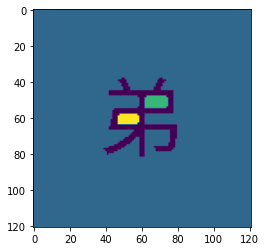

In [15]:
plt.imshow(labels)

In [78]:
flat_list = [item for sublist in image_Labels[10] for item in sublist]
print(labels.shape)
set(flat_list)

(121, 121)


{1, 100}

In [74]:
flat_list = [item for sublist in data for item in sublist]
print(data.shape)
set(flat_list)

(121, 121)


{0, 255}

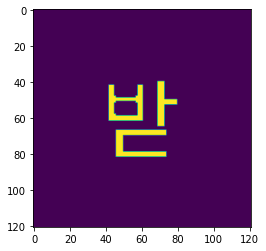

In [79]:
plt.imshow(image_Labels[20])